In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('/Users/rileydouglas/Downloads/Research_final.csv')
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,39,5,1,3,12691,777,...,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,44,6,1,2,8256,864,...,0,1,0,0,0,0,1,0,0,0
2,1,51,1,3,36,4,1,0,3418,0,...,0,1,0,0,0,0,1,0,0,0
3,1,40,0,4,34,3,4,1,3313,2517,...,0,0,1,0,0,0,1,0,0,0
4,1,40,1,3,21,5,1,0,4716,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,40,3,2,3,4003,1851,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,1,2,25,4,2,3,4277,2186,...,0,0,0,0,0,1,1,0,0,0
10124,0,44,0,1,36,5,3,4,5409,0,...,0,0,1,0,0,0,1,0,0,0
10125,0,30,1,2,36,4,3,3,5281,0,...,0,1,0,0,0,0,1,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition_Flag',axis='columns')
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [4]:
X_train.shape

(8101, 36)

In [5]:
X_test.shape

(2026, 36)

In [8]:
X_train[:10]

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2111,45,0,2,36,6,6,3,2803,0,2803,...,0,1,0,0,0,0,1,0,0,0
1107,37,1,4,24,3,1,4,5335,2145,3190,...,0,0,1,0,0,0,1,0,0,0
8131,51,0,3,36,2,3,3,4762,0,4762,...,0,0,0,0,0,0,1,0,0,0
9821,45,0,3,36,4,3,3,3544,1661,1883,...,0,0,1,0,0,0,1,0,0,0
5409,54,0,3,36,6,1,2,4928,1805,3123,...,0,1,0,0,0,0,1,0,0,0
9023,45,1,5,40,1,2,0,29227,1151,28076,...,0,1,0,0,0,0,1,0,0,0
7569,42,0,0,31,3,3,4,2712,0,2712,...,0,0,0,0,1,0,1,0,0,0
9791,48,1,1,44,2,3,1,15355,1823,13532,...,0,0,0,0,0,0,1,0,0,0
6938,40,1,4,35,5,4,1,9974,2185,7789,...,0,1,0,0,0,0,1,0,0,0
5110,44,1,1,33,6,2,3,4969,1187,3782,...,0,0,0,0,0,1,1,0,0,0


## Implementing ANN 

In [9]:
len(X_train.columns)

36

In [64]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.Dropout(0.3),           
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),  
    keras.layers.Dropout(0.3),          
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
254/254 [==============================] - 1s 1ms/step - loss: 0.5862 - accuracy: 0.6992
Epoch 2/200
254/254 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8362
Epoch 3/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8469
Epoch 4/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8475
Epoch 5/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8568
Epoch 6/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8554
Epoch 7/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8561
Epoch 8/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8568
Epoch 9/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8610
Epoch 10/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3473 - accura

In [65]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

64/64 [==============================] - 0s 831us/step - loss: 0.1996 - accuracy: 0.9151
Test Loss: 0.19962191581726074
Test Accuracy: 0.9151036739349365


In [45]:
#1st 10 predictions 
yp = model.predict(X_test)
yp[:10]

64/64 [==============================] - 0s 693us/step


array([[0.8845489 ],
       [0.99160856],
       [0.46056947],
       [0.9997081 ],
       [0.3774525 ],
       [0.36409572],
       [0.9414967 ],
       [0.9997462 ],
       [0.6921576 ],
       [0.93897164]], dtype=float32)

In [46]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [47]:
y_pred[:10]

[1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

In [48]:
y_test[:10]

1646    1
7880    1
7586    0
9646    1
7165    0
9884    1
2150    1
6798    1
4423    1
1977    1
Name: Attrition_Flag, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.61      0.71       351
           1       0.92      0.98      0.95      1675

    accuracy                           0.92      2026
   macro avg       0.89      0.79      0.83      2026
weighted avg       0.91      0.92      0.91      2026



Text(95.72222222222221, 0.5, 'Truth')

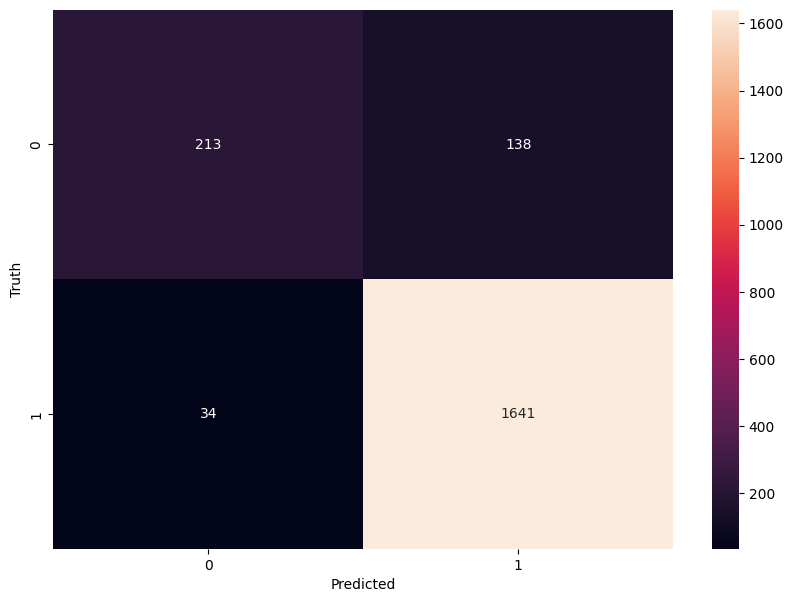

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')